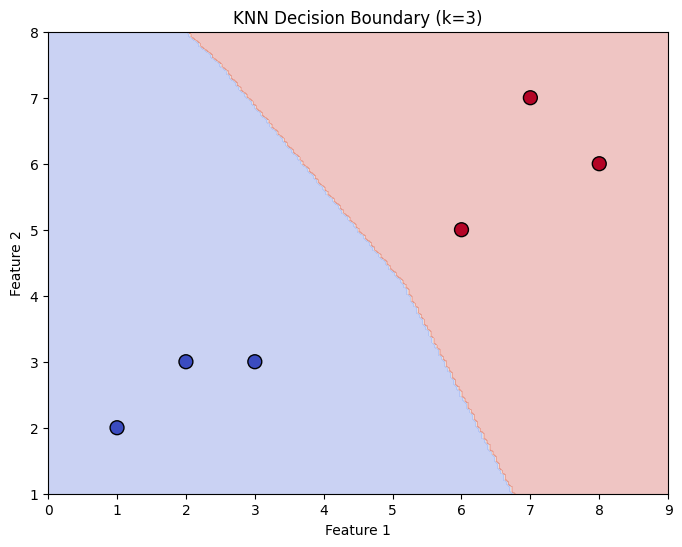

In [ ]:
import torch
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []

        for x in X:
            distances = torch.sqrt(torch.sum((self.X_train - x) ** 2, dim=1))
            k_indices = torch.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            most_common = Counter(k_labels.tolist()).most_common(1)
            predictions.append(most_common[0][0])

        return torch.tensor(predictions)

X_train = torch.tensor([
    [1.0, 2.0],
    [2.0, 3.0],
    [3.0, 3.0],
    [6.0, 5.0],
    [7.0, 7.0],
    [8.0, 6.0]
])

y_train = torch.tensor([0, 0, 0, 1, 1, 1])

knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)


# Create Mesh Grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid_points = torch.tensor(
    np.c_[xx.ravel(), yy.ravel()],
    dtype=torch.float32
)


# Predict on Grid
with torch.no_grad():
    Z = knn.predict(grid_points)

Z = Z.reshape(xx.shape)

# Plot Decision Regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Plot training points
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap="coolwarm",
    edgecolor="k",
    s=100
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary (k=3)")
plt.show()
